In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

colors = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']

transit = pd.read_csv(r"datasets/ACS_15_5YR_B08101-4 DCMDVA/ACS_15_5YR_B08101.csv")
transit["Drive_Pct"] = (transit["HD01_VD10"] + transit["HD01_VD18"])/transit["HD01_VD01"]
transit = transit.set_index("GEO.id")
transit.head()

,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD03,HD02_VD03,HD01_VD04,HD02_VD04,HD01_VD05,HD02_VD05,...,HD02_VD53,HD01_VD54,HD02_VD54,HD01_VD55,HD02_VD55,HD01_VD56,HD02_VD56,HD01_VD57,HD02_VD57,Drive_Pct
GEO.id,,,,,,,,,,,,,,,,,,,,,
1400000US11001000100,11001000100,"Census Tract 1, District of Columbia, District...",3133,335,4,10,266,220,1509,266,...,104,90,71,72,67,49,57,29,32,0.330035
1400000US11001000201,11001000201,"Census Tract 2.01, District of Columbia, Distr...",1222,308,618,223,560,225,19,30,...,20,0,12,10,23,0,12,0,12,0.061375
1400000US11001000202,11001000202,"Census Tract 2.02, District of Columbia, Distr...",2234,324,83,61,695,283,692,138,...,43,12,18,43,38,24,25,39,30,0.318263
1400000US11001000300,11001000300,"Census Tract 3, District of Columbia, District...",4065,420,0,17,691,292,2263,317,...,82,72,75,16,24,73,95,26,28,0.496433
1400000US11001000400,11001000400,"Census Tract 4, District of Columbia, District...",777,100,11,14,29,26,284,83,...,54,31,25,12,13,13,13,19,17,0.581725


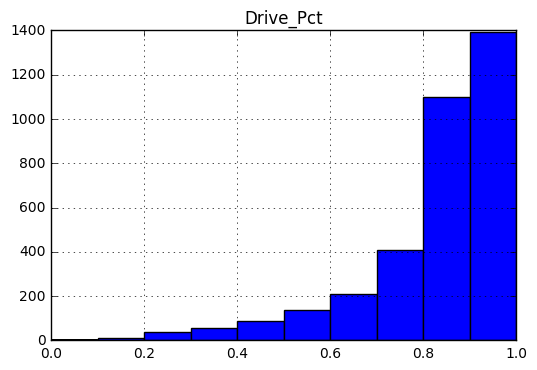

In [2]:
transit.hist("Drive_Pct")
plt.show()

In [3]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, axisbg='w', frame_on=False)

m = Basemap(projection='merc',llcrnrlat=38.7,urcrnrlat=39.15,\
            llcrnrlon=-77.4,urcrnrlon=-76.8,resolution='c')
m.readshapefile(r"datasets/gz_2010_11_140_00_500k/gz_2010_11_140_00_500k",'dc',drawbounds = False)
m.readshapefile(r"datasets/gz_2010_24_140_00_500k/gz_2010_24_140_00_500k",'md',drawbounds = False)
m.readshapefile(r"datasets/gz_2010_51_140_00_500k/gz_2010_51_140_00_500k","va",drawbounds = False)


(1905,
 5,
 [-83.67541299999999, 36.540738, 0.0, 0.0],
 [-75.242266, 39.466012, 0.0, 0.0])

In [4]:
for state in [zip(m.dc_info,m.dc),zip(m.va_info,m.va),zip(m.md_info,m.md)]:
    for info, shape in state:
        geo_id = info["GEO_ID"]
        if geo_id not in transit.index:
            color = "#000000"
        else:
            drive_pct = transit.loc[geo_id,"Drive_Pct"]
            if drive_pct > 0.9:
                color = colors[8]
            elif drive_pct > 0.8:
                color = colors[7]
            elif drive_pct > 0.7:
                color = colors[6]
            elif drive_pct > 0.6:
                color = colors[5]
            elif drive_pct > 0.5:
                color = colors[4]
            elif drive_pct > 0.4:
                color = colors[3]
            elif drive_pct > 0.3:
                color = colors[2]
            elif drive_pct > 0.2:
                color = colors[1]
            else:
                color = colors[0]

        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax.add_collection(pc)

In [5]:
labels = ["<20%",">20%",">30%",">40%",">50%",">60%",">70%",">80%",">90%"]
for i in range(0,len(labels)):
    m.plot(0,0,color=colors[i],label=labels[i])

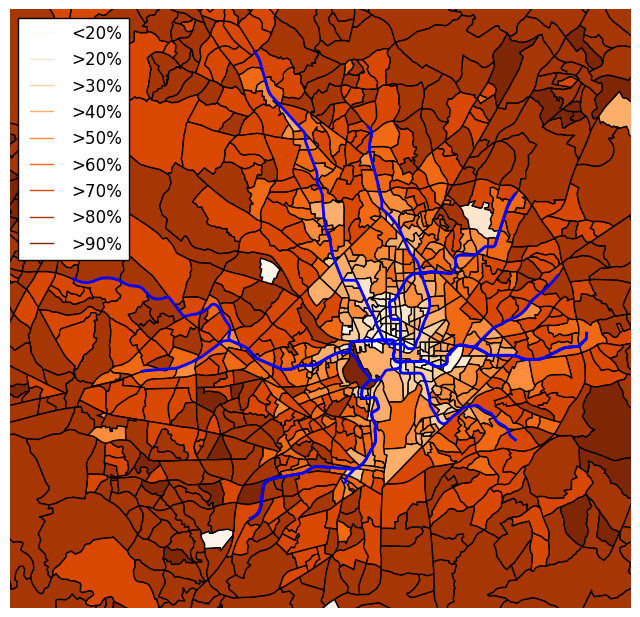

In [6]:
m.readshapefile(r"datasets/DC Metro Lines/Metro_Lines_Regional", "metro", linewidth=2, color="blue")
# m.readshapefile(r"datasets/interstates/in101503", "highways", linewidth=2, color="grey")
plt.legend(loc=2)
plt.show()